<a href="https://colab.research.google.com/github/smcck222/TMDB-5000-Box-Office-Prediction/blob/main/Box_Office_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **MOVIE REVENUE PREDICTION**
###### **Preprocessing and Data Visualization of TMDB 5000 Movie Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We begin by reading the movies and credits datasets.
Following this, we parse the JSON columns. 

In [ ]:
import pandas as pd 

# Reading data. 
movies = pd.read_csv("/content/drive/My Drive/DV Project/Movies_edit.csv", encoding='utf-8')
credits = pd.read_csv("/content/drive/My Drive/DV Project/Credits.csv",encoding='utf-8')

In [ ]:
print("CREDITS DATASET: ", credits.columns) 
print("\nMOVIES DATASET: ", movies.columns)

CREDITS DATASET:  Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

MOVIES DATASET:  Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


In [ ]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


**DATA PREPROCESSING**

In [ ]:
from time import time, strftime
import calendar
import json
import warnings

json_cols = 'cast', 'crew'
for c in json_cols:
  credits[c] = credits[c].map(json.loads)

In [ ]:
json_cols = 'genres','keywords', 'production_countries', 'production_companies'
# 'spoken_languages' has a comma delimiter problem idk why. 
for c in json_cols:
  movies[c] = movies[c].map(json.loads)

In [ ]:
movies['keywords']

0       [{'id': 1463, 'name': 'culture clash'}, {'id':...
1       [{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...
2       [{'id': 470, 'name': 'spy'}, {'id': 818, 'name...
3       [{'id': 849, 'name': 'dc comics'}, {'id': 853,...
4       [{'id': 818, 'name': 'based on novel'}, {'id':...
                              ...                        
4798    [{'id': 5616, 'name': 'united states–mexico ba...
4799                                                   []
4800    [{'id': 248, 'name': 'date'}, {'id': 699, 'nam...
4801                                                   []
4802    [{'id': 1523, 'name': 'obsession'}, {'id': 224...
Name: keywords, Length: 4803, dtype: object

In [ ]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

We drop columns that we will not need for analysis or prediction.

In [ ]:
# Dropping useless columns. 
movies = movies.drop(['homepage', 'status', 'tagline'], axis = 1)

In [ ]:
credits['movie_id'].nunique()

4803

In [ ]:
movies["id"].nunique() 

4803

We join the movies and credits tables with the common ID attribute. 

In [ ]:
# Joining both tables with the ID attribute. 
data = pd.merge(left = movies, right = credits, left_on = 'id', right_on = 'movie_id')

In [ ]:
data.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
data.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'title_x', 'vote_average', 'vote_count', 'movie_id',
       'title_y', 'cast', 'crew'],
      dtype='object')

In [ ]:
print(data.pivot_table(index=['title_y'],aggfunc='size')) 
print("NULL Values: ", data['title_y'].isnull().sum())
print("Unique values: ", data['title_x'].nunique())

title_y
#Horror                       1
(500) Days of Summer          1
10 Cloverfield Lane           1
10 Days in a Madhouse         1
10 Things I Hate About You    1
                             ..
[REC]²                        1
eXistenZ                      1
xXx                           1
xXx: State of the Union       1
Æon Flux                      1
Length: 4800, dtype: int64
NULL Values:  0
Unique values:  4800


In [ ]:
print(data.pivot_table(index=['title_x'],aggfunc='size')) 
print("NULL Values: ", data['title_x'].isnull().sum())
print("Unique values: ", data['title_x'].nunique())

title_x
#Horror                    1
(500) Days of Summer       1
02:13                      1
10 Cloverfield Lane        1
10 Days in a Madhouse      1
                          ..
[REC]²                     1
eXistenZ                   1
xXx                        1
xXx: State of the Union    1
Æon Flux                   1
Length: 4800, dtype: int64
NULL Values:  0
Unique values:  4800


In [ ]:
print(data.pivot_table(index=['original_title'],aggfunc='size')) 
print("NULL Values: ", data['original_title'].isnull().sum())
print("Unique values: ", data['original_title'].nunique())

original_title
#Horror                                 1
$upercapitalist                         1
(500) Days of Summer                    1
...E tu vivrai nel terrore! L'aldilà    1
02:13                                   1
                                       ..
인천상륙작전                                  1
좋은 놈, 나쁜 놈, 이상한 놈                       1
친절한 금자씨                                 1
태극기 휘날리며                                1
해운대                                     1
Length: 4801, dtype: int64
NULL Values:  0
Unique values:  4801


In [ ]:
data['id'].isnull().sum()

0

In [ ]:
data = data.drop('movie_id', axis = 1)

In [ ]:
data.shape

(4803, 20)

The number of unique IDs is equal to the number of rows in the dataset (4803). Meaning that original_title has repetitions. We need to find out. 

In [ ]:
data[data.duplicated(['original_title'])]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title_x,vote_average,vote_count,title_y,cast,crew
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",10844,"[{""id"": 2658, ""name"": ""new zealand""}, {""id"": 3...",en,Out of the Blue,Ordinary people find extraordinary courage in ...,0.706355,[],"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Out of the Blue,5.9,18,Out of the Blue,"[{""cast_id"": 12, ""character"": ""Nick Harvey"", ""...","[{""credit_id"": ""52fe43c19251416c7501cceb"", ""de..."
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",2661,"[{""id"": 339, ""name"": ""submarine""}, {""id"": 849,...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Batman,6.1,203,Batman,"[{""cast_id"": 17, ""character"": ""Batman / Bruce ...","[{""credit_id"": ""52fe4363c3a36847f80509a7"", ""de..."


In [ ]:
data[data.duplicated(['title_x'])]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title_x,vote_average,vote_count,title_y,cast,crew
2877,11000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",1255,"[{""id"": 1261, ""name"": ""river""}, {""id"": 1880, ""...",ko,괴물,Gang-du is a dim-witted man working at his fat...,27.655270,"[{""name"": ""Cineclick Asia"", ""id"": 685}, {""name...","[{""iso_3166_1"": ""KR"", ""name"": ""South Korea""}]",2006-07-27,88489643,119.0,"[{""iso_639_1"": ""ko"", ""name"": ""Korean""}]",The Host,6.7,537,The Host,"[{""cast_id"": 3, ""character"": ""Park Gang-du"", ""...","[{""credit_id"": ""52fe42eac3a36847f802ca6b"", ""de..."
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",10844,"[{""id"": 2658, ""name"": ""new zealand""}, {""id"": 3...",en,Out of the Blue,Ordinary people find extraordinary courage in ...,0.706355,[],"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Out of the Blue,5.9,18,Out of the Blue,"[{""cast_id"": 12, ""character"": ""Nick Harvey"", ""...","[{""credit_id"": ""52fe43c19251416c7501cceb"", ""de..."
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",2661,"[{""id"": 339, ""name"": ""submarine""}, {""id"": 849,...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Batman,6.1,203,Batman,"[{""cast_id"": 17, ""character"": ""Batman / Bruce ...","[{""credit_id"": ""52fe4363c3a36847f80509a7"", ""de..."


In [ ]:
data[data.duplicated(['title_y'])]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title_x,vote_average,vote_count,title_y,cast,crew
2877,11000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",1255,"[{""id"": 1261, ""name"": ""river""}, {""id"": 1880, ""...",ko,괴물,Gang-du is a dim-witted man working at his fat...,27.655270,"[{""name"": ""Cineclick Asia"", ""id"": 685}, {""name...","[{""iso_3166_1"": ""KR"", ""name"": ""South Korea""}]",2006-07-27,88489643,119.0,"[{""iso_639_1"": ""ko"", ""name"": ""Korean""}]",The Host,6.7,537,The Host,"[{""cast_id"": 3, ""character"": ""Park Gang-du"", ""...","[{""credit_id"": ""52fe42eac3a36847f802ca6b"", ""de..."
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",10844,"[{""id"": 2658, ""name"": ""new zealand""}, {""id"": 3...",en,Out of the Blue,Ordinary people find extraordinary courage in ...,0.706355,[],"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Out of the Blue,5.9,18,Out of the Blue,"[{""cast_id"": 12, ""character"": ""Nick Harvey"", ""...","[{""credit_id"": ""52fe43c19251416c7501cceb"", ""de..."
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",2661,"[{""id"": 339, ""name"": ""submarine""}, {""id"": 849,...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Batman,6.1,203,Batman,"[{""cast_id"": 17, ""character"": ""Batman / Bruce ...","[{""credit_id"": ""52fe4363c3a36847f80509a7"", ""de..."


In [ ]:
data[data["original_title"]=="Out of the Blue"]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title_x,vote_average,vote_count,title_y,cast,crew
3647,0,"[{""id"": 18, ""name"": ""Drama""}]",39269,"[{""id"": 4470, ""name"": ""punk""}, {""id"": 10183, ""...",en,Out of the Blue,Dennis Hopper is a hard-drinking truck driver ...,0.679351,"[{""name"": ""Robson Street"", ""id"": 71953}]","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}]",1980-05-01,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Out of the Blue,6.5,17,Out of the Blue,"[{""cast_id"": 2, ""character"": ""Don"", ""credit_id...","[{""credit_id"": ""52fe47099251416c9106826f"", ""de..."
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",10844,"[{""id"": 2658, ""name"": ""new zealand""}, {""id"": 3...",en,Out of the Blue,Ordinary people find extraordinary courage in ...,0.706355,[],"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Out of the Blue,5.9,18,Out of the Blue,"[{""cast_id"": 12, ""character"": ""Nick Harvey"", ""...","[{""credit_id"": ""52fe43c19251416c7501cceb"", ""de..."


In [ ]:
data[data["original_title"]=="Batman"]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title_x,vote_average,vote_count,title_y,cast,crew
1359,35000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",268,"[{""id"": 848, ""name"": ""double life""}, {""id"": 84...",en,Batman,The Dark Knight of Gotham City begins his war ...,44.104469,"[{""name"": ""PolyGram Filmed Entertainment"", ""id...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1989-06-23,411348924,126.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Batman,7.0,2096,Batman,"[{""cast_id"": 5, ""character"": ""Jack Napier/The ...","[{""credit_id"": ""52fe422fc3a36847f800aa4b"", ""de..."
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",2661,"[{""id"": 339, ""name"": ""submarine""}, {""id"": 849,...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Batman,6.1,203,Batman,"[{""cast_id"": 17, ""character"": ""Batman / Bruce ...","[{""credit_id"": ""52fe4363c3a36847f80509a7"", ""de..."


In [ ]:
data[data["title_x"]=="The Host"]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title_x,vote_average,vote_count,title_y,cast,crew
972,44000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",72710,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,The Host,A parasitic alien soul is injected into the bo...,42.933027,"[{""name"": ""Nick Wechsler Productions"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-03-22,63327201,125.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Host,6.0,1817,The Host,"[{""cast_id"": 52, ""character"": ""Melanie Stryder...","[{""credit_id"": ""52fe487bc3a368484e0fa919"", ""de..."
2877,11000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",1255,"[{""id"": 1261, ""name"": ""river""}, {""id"": 1880, ""...",ko,괴물,Gang-du is a dim-witted man working at his fat...,27.655270,"[{""name"": ""Cineclick Asia"", ""id"": 685}, {""name...","[{""iso_3166_1"": ""KR"", ""name"": ""South Korea""}]",2006-07-27,88489643,119.0,"[{""iso_639_1"": ""ko"", ""name"": ""Korean""}]",The Host,6.7,537,The Host,"[{""cast_id"": 3, ""character"": ""Park Gang-du"", ""...","[{""credit_id"": ""52fe42eac3a36847f802ca6b"", ""de..."


We infer that the IDs are unique and match with the total number of rows. We remove title_y and original_title beacause they are not required and because some original titles are not in the English language. We hence retain only title_x.

In [ ]:
data = data.drop(['title_y', 'original_title'], axis = 1)

We now examine and handle the issues with NULL values in rows. 

In [ ]:
# Examining columns with null values. 
data.isnull().sum(axis=0)

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
overview                4
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
title_x                 0
vote_average            0
vote_count              0
cast                    0
crew                    0
dtype: int64

In [ ]:
data[data["overview"].isnull()]

,budget,genres,id,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title_x,vote_average,vote_count,cast,crew
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Spanish""}]",Chiamatemi Francesco - Il Papa della gente,7.3,12,"[{""cast_id"": 5, ""character"": ""Jorge Mario Berg...","[{""credit_id"": ""5660019ac3a36875f100252b"", ""de..."
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],"To Be Frank, Sinatra at 100",0.0,0,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de..."
4401,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",43630,[],en,NaN,0.020600,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-01-01,0,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Helix... Loaded,4.8,2,[],[]
4431,913000,"[{""id"": 99, ""name"": ""Documentary""}]",292539,[],de,NaN,0.795698,[],[],2014-04-26,0,83.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Food Chains,7.4,8,[],"[{""credit_id"": ""5470c3b1c3a368085e000abd"", ""de..."


In [ ]:
# Removing overview because we won't use it. 
data = data.drop(['overview'], axis = 1)

In [ ]:
# Dealing with NULL values in runtime column. 
data[data["runtime"].isnull()]

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title_x,vote_average,vote_count,cast,crew
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Spanish""}]",Chiamatemi Francesco - Il Papa della gente,7.3,12,"[{""cast_id"": 5, ""character"": ""Jorge Mario Berg...","[{""credit_id"": ""5660019ac3a36875f100252b"", ""de..."
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],"To Be Frank, Sinatra at 100",0.0,0,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de..."


Since runtime null values are 2 in number, we manually fill them up. 

In [ ]:
data.loc[data["title_x"]=="To Be Frank, Sinatra at 100",'runtime'] = 81

In [ ]:
data.loc[data["title_x"]=="Chiamatemi Francesco - Il Papa della gente",'runtime'] = 98

In [ ]:
data[data["runtime"].isnull()]

,budget,genres,id,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title_x,vote_average,vote_count,cast,crew


In [ ]:
# Dealing with NULL values in release date. 
data[data["release_date"].isnull()]

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title_x,vote_average,vote_count,cast,crew
4553,0,[],380097,[],en,0.0,[],[],NaN,0,0.0,[],America Is Still the Place,0.0,0,[],[]


In [ ]:
# Dropping entire row. 
data = data[data['id'] != 380097]

In [ ]:
data.isnull().sum(axis=0)

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
title_x                 0
vote_average            0
vote_count              0
cast                    0
crew                    0
dtype: int64

We do not have any more NULL values, but still have empty lists [] in a lot of other columns, 

In [ ]:
# Dealing with empty lists => because they won't show up as null 
# ( keywords, genres, production_companies, production_countries, spoken_languages, cast, crew )

print("Keywords Null: ", (data["keywords"] == '[]').sum() )
print("Genres Null: ", (data["genres"] == '[]').sum() )
print("Production Companies Null: ", (data["production_companies"] == '[]').sum() )
print("Production Countries Null: ", (data["production_countries"] == '[]').sum() )
print("Spoken Languages Null: ", (data["spoken_languages"] == '[]').sum() )
print("Cast  Null: ", (data["cast"] == '[]').sum() )
print("Crew Null: ", (data["crew"] == '[]').sum() )

Keywords Null:  411
Genres Null:  27
Production Companies Null:  350
Production Countries Null:  173
Spoken Languages Null:  79
Cast  Null:  42
Crew Null:  27


In [ ]:
# Dealing with genres with []
data[data["genres"] == '[]']

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title_x,vote_average,vote_count,cast,crew
3971,0,[],191229,[],en,0.214704,[],[],1988-04-01,0,88.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Iguana,6.0,1,"[{""cast_id"": 6, ""character"": ""Oberlus"", ""credi...","[{""credit_id"": ""52fe4c7d9251416c910f68ab"", ""de..."
3992,0,[],346081,[],en,0.296981,[],"[{""iso_3166_1"": ""IN"", ""name"": ""India""}]",2015-06-26,0,0.0,[],Sardaarji,9.5,2,[],"[{""credit_id"": ""558ab3f4925141076f0001d7"", ""de..."
4068,0,[],371085,[],en,0.027801,[],[],2015-01-01,0,0.0,[],Sharkskin,0.0,0,[],[]
4105,2000000,[],48382,[],en,0.031947,[],[],2003-09-12,1672730,120.0,[],"The Book of Mormon Movie, Volume 1: The Journey",5.0,2,"[{""cast_id"": 1, ""character"": ""Sam"", ""credit_id...",[]
4118,0,[],325140,[],en,0.001186,[],[],2000-05-26,0,0.0,[],Hum To Mohabbat Karega,0.0,0,[],[]
4293,1,[],357834,[],en,0.025364,"[{""name"": ""Zelko Films"", ""id"": 62451}]","[{""iso_3166_1"": ""DZ"", ""name"": ""Algeria""}, {""is...",2015-08-07,0,99.0,[],The Algerian,0.0,0,"[{""cast_id"": 8, ""character"": ""Ali"", ""credit_id...","[{""credit_id"": ""55e8591ac3a3682c640023d1"", ""de..."
4314,1200000,[],137955,[],en,0.057564,[],"[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}]",2012-01-01,0,84.0,[],Crowsnest,4.8,12,[],[]
4385,0,[],206412,[],en,0.690089,[],[],2000-05-14,0,90.0,[],Lisa Picard Is Famous,4.0,1,"[{""cast_id"": 2, ""character"": """", ""credit_id"": ...","[{""credit_id"": ""52fe4d1cc3a368484e1d7ae7"", ""de..."
4400,0,[],219716,[],en,0.547654,[],[],1999-03-19,0,96.0,[],Sparkler,0.0,1,"[{""cast_id"": 2, ""character"": ""Melba May"", ""cre...","[{""credit_id"": ""52fe4e6cc3a368484e21ff03"", ""de..."
4413,0,[],335874,[],en,0.243853,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-03,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Childless,4.5,2,"[{""cast_id"": 1, ""character"": """", ""credit_id"": ...","[{""credit_id"": ""55575bb49251411e62005cfd"", ""de..."


There are 27 rows with the genre field as an empty list. We attempt to fill them up manually. 

In [ ]:
# Filling up empty genres. # Some of them have other fields as 0 though. Will have to be dealt with at some point. 

data.loc[data["title_x"] == "Iguana",'genres'] = '[{"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}, {"id": 80, "name": "Crime"}, {"id": 12, "name": "Adventure"}]'
data.loc[data["title_x"] == "Sardaarji", 'genres'] = '[{"id": 35, "name": "Comedy"}, {"id": 14, "name": "Fantasy"}, { "id": 27,"name": "Horror"}, {"id": 10749, "name": "Romance"}]'
data.loc[data["title_x"] == "Sharkskin", 'genres'] = '[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}, {"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}, {"id": 9648,"name": "Mystery"}]'
data.loc[data["title_x"] == "The Book of Mormon Movie, Volume 1: The Journey", 'genres'] = '[{"id": 12, "name": "Adventure"}]'
data.loc[data["title_x"] == "Hum To Mohabbat Karega", 'genres'] = '[{"id": 35, "name": "Comedy"}, {"id": 53, "name": "Thriller"} , {"id": 10749, "name": "Romance"}, {"id": 28,"name": "Action"}]'
data.loc[data["title_x"] == "The Algerian", 'genres'] = '[{"id": 28,"name": "Action"}, {"id": 10749, "name": "Romance"}, {"id": 53, "name": "Thriller"}]'
data.loc[data["title_x"] == "Crowsnest", 'genres'] = '[{"id": 27,"name": "Horror"}, {"id": 53, "name": "Thriller"}, {"id": 9648, "name": "Mystery"}]'
data.loc[data["title_x"] == "Lisa Picard Is Famous", 'genres'] = '[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]'
data.loc[data["title_x"] == "Sparkler", 'genres'] = '[{"id": 18, "name": "Drama"}, {"id": 10402, "name": "Music"}]'
data.loc[data["title_x"] == "Childless", 'genres'] = '[{"id": 18, "name": "Drama"}]'
data.loc[data["title_x"] == "Harrison Montgomery", 'genres'] = '[{"id": 18, "name": "Drama"}]'
data.loc[data["title_x"] == "Light from the Darkroom", 'genres'] = '[{"id": 28,"name": "Action"}, {"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}]'
data.loc[data["title_x"] == "The Little Ponderosa Zoo", 'genres'] = '[{"id": 10751, "name": "Family"}]'
data.loc[data["title_x"] == "Diamond Ruff", 'genres'] = '[{"id": 28,"name": "Action"}]'
data.loc[data["title_x"] == "Mutual Friends", 'genres'] = '[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]'
data.loc[data["title_x"] == "Rise of the Entrepreneur: The Search for a Better Way", 'genres'] = '[{"id": 99, "name": "Documentary"}]'
data.loc[data["title_x"] == "Gory Gory Hallelujah", 'genres'] = '[{"id": 35, "name": "Comedy"}, {"id": 14, "name": "Fantasy"}, {"id": 27,"name": "Horror"}, {"id": 10402, "name": "Music"}]'
data.loc[data["title_x"] == "The Big Swap", 'genres'] = '[{"id": 18, "name": "Drama"}]'
data.loc[data["title_x"] == "The Looking Glass", 'genres'] = '[{"id": 53, "name": "Thriller"}, {"id": 9648, "name": "Mystery"} ]'
data.loc[data["title_x"] == "Death Calls", 'genres'] = '[{"id": 27,"name": "Horror"}]'
data.loc[data["title_x"] == "UnDivided", 'genres'] = '[{"id": 99, "name": "Documentary"}]'
data.loc[data["title_x"] == "Short Cut to Nirvana: Kumbh Mela", 'genres'] = '[{"id": 99, "name": "Documentary"}]'
data.loc[data["title_x"] == "Reality Show", 'genres'] = '[{"id": 99, "name": "Documentary"}]'
data.loc[data["title_x"] == "An American in Hollywood", 'genres'] = '[{"id": 18, "name": "Drama"}]'
data.loc[data["title_x"] == "The Blood of My Brother: A Story of Death in Iraq", 'genres'] = '[{"id": 99, "name": "Documentary"}, {"id": 10752, "name": "War"}]'
data.loc[data["title_x"] == "Shanghai Calling", 'genres'] = '[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}, {"id": 18, "name": "Drama"}]'
data.loc[data["title_x"] == 'The Outrageous Sophie Tucker', 'genres'] = '[{"id": 99, "name": "Documentary"}]'

In [ ]:
data.dtypes

budget                    int64
genres                   object
id                        int64
keywords                 object
original_language        object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
title_x                  object
vote_average            float64
vote_count                int64
cast                     object
crew                     object
dtype: object

In [ ]:
data[data["id"] == 191229]['genres']

3971    [{"id": 18, "name": "Drama"}, {"id": 53, "name...
Name: genres, dtype: object

In [ ]:
data[data["id"] == 328307	]['title_x']

4571    Rise of the Entrepreneur: The Search for a Bet...
Name: title_x, dtype: object

In [ ]:
data[data["genres"] == '[]']

,budget,genres,id,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title_x,vote_average,vote_count,cast,crew


In [ ]:
# Reviewing NULL values 

print("Keywords Null: ", (data["keywords"] == '[]').sum() )
print("Genres Null: ", (data["genres"] == '[]').sum() )
print("Production Companies Null: ", (data["production_companies"] == '[]').sum() )
print("Production Countries Null: ", (data["production_countries"] == '[]').sum() )
print("Spoken Languages Null: ", (data["spoken_languages"] == '[]').sum() )
print("Cast  Null: ", (data["cast"] == '[]').sum() )
print("Crew Null: ", (data["crew"] == '[]').sum() )

Keywords Null:  411
Genres Null:  0
Production Companies Null:  350
Production Countries Null:  173
Spoken Languages Null:  79
Cast  Null:  42
Crew Null:  27


**EXPLORATORY ANALYSIS AND DATA VISUALIZATION**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plotting interactive graphs.


from numpy import median
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Exporting processed dataframe to drive. 
# Don't run any of the above code from now on. Just import librarires and data.csv

data.to_csv('data.csv')
!cp data.csv "drive/My Drive/"

In [ ]:
data = pd.read_csv("/content/drive/My Drive/data.csv", encoding='utf-8')
data1 = data 

To aid visualization, we change the date format to year and month. We also extract all JSON columns into a more readable format, into separate dataframes. 

In [ ]:
# Changing date format to only yyyy-mm

data1['release_date'] = data1['release_date'].apply(lambda x : x[0:7])

In [ ]:
# Extracting all Json columns into more readable format. 

In [ ]:
def value_update(s, d, idxes):
  for idx in idxes:
      d[idx] = s[idx]

def calculate_json_col(row, src_col, kept_cols):
  df = None
  if row[src_col]:
      df = pd.DataFrame.from_records(row[src_col])
  else:
      df = pd.DataFrame()
  if kept_cols:
      value_update(row, df, kept_cols)
  return df

def collect_json_col(src_df, src_col, kept_cols):
  return pd.concat( map(lambda x: calculate_json_col(src_df.loc[x], src_col, kept_cols), src_df.index), axis=0, ignore_index=True)
  
kept_cols = ['title_x', 'id', 'revenue', 'budget']

In [ ]:
cast_df = collect_json_col(data, 'cast', kept_cols)
crew_df = collect_json_col(data, 'crew', kept_cols)

In [ ]:
cast_df

,budget,cast_id,character,credit_id,gender,id,name,order,revenue,title_x
0,237000000,242.0,Jake Sully,5602a8a7c3a3685532001c9a,2.0,19995,Sam Worthington,0.0,2787965087,Avatar
1,237000000,3.0,Neytiri,52fe48009251416c750ac9cb,1.0,19995,Zoe Saldana,1.0,2787965087,Avatar
2,237000000,25.0,Dr. Grace Augustine,52fe48009251416c750aca39,1.0,19995,Sigourney Weaver,2.0,2787965087,Avatar
3,237000000,4.0,Col. Quaritch,52fe48009251416c750ac9cf,2.0,19995,Stephen Lang,3.0,2787965087,Avatar
4,237000000,5.0,Trudy Chacon,52fe48009251416c750ac9d3,1.0,19995,Michelle Rodriguez,4.0,2787965087,Avatar
...,...,...,...,...,...,...,...,...,...,...
106252,0,8.0,Himself,58ce018c9251415a7d016e36,2.0,25975,Eric Roberts,3.0,0,My Date with Drew
106253,0,9.0,Himself,58ce01b99251415a7d016e7d,0.0,25975,Griffin Dunne,4.0,0,My Date with Drew
106254,0,10.0,Himself,58ce01d19251415a8b0168be,2.0,25975,Samuel L. Jackson,5.0,0,My Date with Drew
106255,0,11.0,Himself,58ce01dd9251415a39016580,2.0,25975,Matt LeBlanc,6.0,0,My Date with Drew


In [ ]:
genres_df = collect_json_col(data1, 'genres', kept_cols, )

In [ ]:
keywords_df = collect_json_col(data1, 'keywords', kept_cols)

In [ ]:
production_companies_df = collect_json_col(data1, 'production_companies', kept_cols)

In [ ]:
production_companies_df

,id,name,title_x
0,19995,Ingenious Film Partners,Avatar
1,19995,Twentieth Century Fox Film Corporation,Avatar
2,19995,Dune Entertainment,Avatar
3,19995,Lightstorm Entertainment,Avatar
4,285,Walt Disney Pictures,Pirates of the Caribbean: At World's End
...,...,...,...
13672,9367,Columbia Pictures,El Mariachi
13673,231617,Front Street Pictures,"Signed, Sealed, Delivered"
13674,231617,Muse Entertainment Enterprises,"Signed, Sealed, Delivered"
13675,25975,rusty bear entertainment,My Date with Drew


**(i) Correlation plot between numeric attributes**. 

We observe that revenue is highly correlated to budget, popularity, and vote count. 

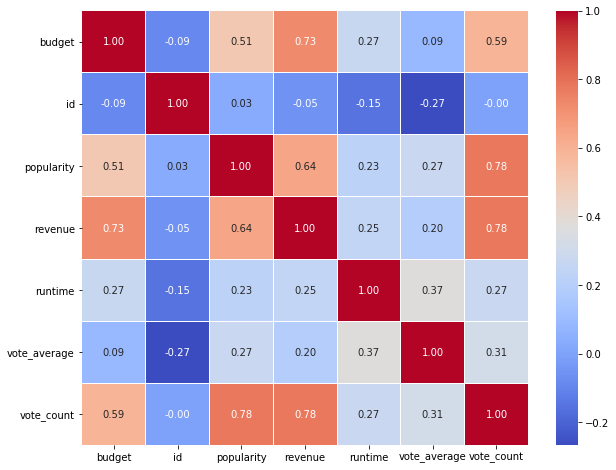

In [ ]:
plt.figure(figsize = (10,8))
g = sns.heatmap(data[list(data)].corr(),annot=True, fmt = ".2f", cmap = "coolwarm",linewidths= 0.01)

In [ ]:
# The Budget is 0 for this record. This was uncovered during visualization.
# Might have to remove all the rows. 
data[data["title_x"]=='O']

,Unnamed: 0,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title_x,vote_average,vote_count,cast,crew
2952,2952,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",11065,"[{'id': 572, 'name': 'sex'}, {'id': 931, 'name...",en,4.146752,"[{'name': 'FilmEngine', 'id': 816}, {'name': '...","[{'iso_3166_1': 'US', 'name': 'United States o...",2001-08,16017403,95.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",O,5.8,75,"[{'cast_id': 1, 'character': 'Odin James', 'cr...","[{'credit_id': '555b54c792514120be000e0c', 'de..."


In [ ]:
# Many of the entries are zero. 
print("Budget Null: ", (data["budget"] == 0).sum() )
print("Popularity Null: ", (data["popularity"] == 0).sum() )
print("Revenue Null: ", (data["revenue"] == 0).sum() )
print("Runtime Null: ", (data["runtime"] == 0).sum() )
print("Vote Average Null: ", (data["vote_average"] == 0.0).sum() )
print("Vote Count Null: ", (data["vote_count"] == 0).sum() )


Budget Null:  1036
Popularity Null:  0
Revenue Null:  1426
Runtime Null:  34
Vote Average Null:  62
Vote Count Null:  61


In [ ]:
# Finding the unique years present in the dataset. 
data1["release_date"].astype(str).str.slice(0,4,1).unique()

array(['2009', '2007', '2015', '2012', '2010', '2016', '2006', '2008',
       '2013', '2011', '2014', '2005', '1997', '2004', '1999', '1995',
       '2003', '2001', '2002', '1998', '2000', '1990', '1991', '1994',
       '1996', '1982', '1993', '1979', '1992', '1989', '1984', '1988',
       '1978', '1962', '1980', '1972', '1981', '1968', '1985', '1940',
       '1963', '1987', '1986', '1973', '1983', '1976', '1977', '1970',
       '1971', '1969', '1960', '1965', '1964', '1927', '1974', '1937',
       '1975', '1967', '1951', '1961', '1946', '1953', '1954', '1959',
       '1932', '1947', '1956', '1945', '1952', '1930', '1966', '1939',
       '1950', '1948', '1958', '1957', '1944', '1938', '1949', '1936',
       '2017', '1941', '1955', '1942', '1929', '1935', '1933', '1916',
       '1934', '1925'], dtype=object)

**(ii) Visualizing the profit made by movies**

By means of a scatter plot between budget and revenue, we can visualize which movies made the most profit. A color gradient also has been added to help. Hovering over the scatter plot will indicate the titles of the movies for better visualization of profit. 

We can see that the movie Avatar is the most profitable, followed by Titanic. 

In [ ]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=go.Scatter(
    text= data['title_x'],
    hoverinfo = 'text', 
    y = data['revenue'],
    x = data['budget'],
    mode='markers',
    marker=dict(
        size=12,
        color=data['revenue']-data['budget'], #Color shows PROFIT MADE
        colorscale='Viridis', # one of plotly colorscales
        showscale=True
    )
))

fig.update_layout(
    title='Budget VS Revenue: Slide Bar shows Profit Made',
    xaxis=dict(
        title='Budget',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Revenue ( Dollars)',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)


fig.show()

**(iii) Visualizing Runtime and its relationship with Revenue and Popularity** 

The color gradient shows the popularity. We notice my hovering over the graph, that Minions, the most popular movie, has a relatively lower runtime and has made the most revenue. There is no highly profitable movie that crosses the 250 min mark. There is also no highly popular movie that crosses the 150 min mark. 

In [ ]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=go.Scatter(
    text=data['title_x'],
    hoverinfo = 'text', 
    y = data['runtime'],
    x = data['revenue'],
    mode='markers',
    marker=dict(
        size=15,
        color=data['popularity'], #set color equal to a variable
        colorscale='Viridis', # one of plotly colorscales
        showscale=True
    )
))

fig.update_layout(
    title='Revenue VS Runtime: Slide Bar shows Popularity',
    xaxis=dict(
        title='Revenue (Dollars)',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Runtime (Minutes)',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)


fig.show()

In [ ]:
data[data["title_x"] == "The Past Is a Grotesque Animal" ]

,budget,genres,id,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title_x,vote_average,vote_count,cast,crew
4736,100,"[{""id"": 99, ""name"": ""Documentary""}, {""id"": 104...",268917,"[{""id"": 2679, ""name"": ""artist""}, {""id"": 33624,...",en,"A personal, accessible look at an artist - Kev...",0.394575,"[{""name"": ""Wrecking Crew"", ""id"": 26403}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2014-06,0,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Past Is a Grotesque Animal,5.5,2,"[{""cast_id"": 0, ""character"": ""Herself"", ""credi...","[{""credit_id"": ""577a157cc3a3686e8f00213e"", ""de..."


In [ ]:
data["runtime"]

0       162.0
1       169.0
2       148.0
3       165.0
4       132.0
        ...  
4798     81.0
4799     85.0
4800    120.0
4801     98.0
4802     90.0
Name: runtime, Length: 4802, dtype: float64

In [ ]:
# List of years in AO 

data2=data1.sort_values(by="release_date")
data2["release_date"]=data2["release_date"].apply(lambda x:x[0:4])
list_unique_years=data2["release_date"].unique()

In [ ]:
# Creating a list with values of {Genre, Total Revenue} for each year in the list. 
import re 

genre_profit_list=[]
for x in list_unique_years:
  genre_distribution={}
  d=data2[data2["release_date"]==x]
  for  z,p in zip(d["genres"],d["revenue"]):
    
    lis_ind=[x.start() for x in re.finditer('}',z)]
    for i in lis_ind:
      st=""
      j=i-1
      while(z[j]!=':'):
        st+=z[j]
        j-=1
      
      print(st[::-1])
      if(st[::-1] in genre_distribution):
        
        genre_distribution[st[::-1]]+=p
      else:
        genre_distribution[st[::-1]]=p

  
  genre_profit_list.append(genre_distribution)
      

In [ ]:
print(genre_profit_list)

[{" 'Drama'": 8394751}, {" 'Drama'": 22000000, " 'Romance'": 22000000, " 'War'": 22000000}, {" 'Drama'": 650422, " 'Science Fiction'": 650422}, {" 'Drama'": 4358000, " 'Thriller'": 0, " 'Romance'": 4358000, " 'Music'": 4358000}, {" 'Action'": 8000000, " 'Drama'": 8000000, " 'History'": 8000000}, {" 'Drama'": 25, " 'Romance'": 25, " 'War'": 25}, {" 'Music'": 2281000, " 'Comedy'": 4481000, " 'Romance'": 2281000}, {" 'Comedy'": 4500000, " 'Romance'": 4500000}, {" 'Comedy'": 3202000, " 'Music'": 3202000, " 'Romance'": 3202000}, {" 'Drama'": 11236000, " 'Comedy'": 8500000, " 'Action'": 2736000, " 'Adventure'": 2736000, " 'War'": 2736000}, {" 'Adventure'": 0, " 'Drama'": 0, " 'Romance'": 0, " 'Fantasy'": 184925486, " 'Animation'": 184925486, " 'Family'": 184925486}, {" 'Drama'": 4000000, " 'Music'": 4000000, " 'Romance'": 11433101, " 'Comedy'": 7433101}, {" 'Adventure'": 33754967, " 'Family'": 33754967, " 'Fantasy'": 33754967, " 'Comedy'": 9600000, " 'Drama'": 409776459, " 'Romance'": 400176

In [ ]:
len(list_unique_years)

90

In [ ]:
print(list_unique_years)

['1916' '1925' '1927' '1929' '1930' '1932' '1933' '1934' '1935' '1936'
 '1937' '1938' '1939' '1940' '1941' '1942' '1944' '1945' '1946' '1947'
 '1948' '1949' '1950' '1951' '1952' '1953' '1954' '1955' '1956' '1957'
 '1958' '1959' '1960' '1961' '1962' '1963' '1964' '1965' '1966' '1967'
 '1968' '1969' '1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977'
 '1978' '1979' '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987'
 '1988' '1989' '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997'
 '1998' '1999' '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007'
 '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017']


In [ ]:
df_tot=[]
for i in range(0,90):
  df=[]
  df.append(list_unique_years[i])
  if(" 'Drama'" in genre_profit_list[i]):
    df.append(genre_profit_list[i][" 'Drama'"])
  else:
    df.append(0)
  if(" 'Action'" in genre_profit_list[i]):
    df.append(genre_profit_list[i][" 'Action'"])
  else:
    df.append(0)
  if(" 'Adventure'" in genre_profit_list[i]):
    df.append(genre_profit_list[i][" 'Adventure'"])
  else:
    df.append(0)
  if(" 'Comedy'" in genre_profit_list[i]):
    df.append(genre_profit_list[i][" 'Comedy'"])
  else:
    df.append(0)
  if(" 'Crime'" in genre_profit_list[i]):
    df.append(genre_profit_list[i][" 'Crime'"])
  else:
    df.append(0)
  if(" 'Fantasy'" in genre_profit_list[i]):
    df.append(genre_profit_list[i][" 'Fantasy'"])
  else:
    df.append(0)
  if(" 'Mystery'" in genre_profit_list[i]):
    df.append(genre_profit_list[i][" 'Mystery'"])
  else:
    df.append(0)
  if(" 'Romance'" in genre_profit_list[i]):
    df.append(genre_profit_list[i][" 'Romance'"])
  else:
    df.append(0)
  if(" 'Horror'" in genre_profit_list[i]):
    df.append(genre_profit_list[i][" 'Horror'"])
  else:
    df.append(0)
  #print(df)
  df_tot.append(df)    

In [ ]:
print(df_tot)

[['1916', 8394751, 0, 0, 0, 0, 0, 0, 0, 0], ['1925', 22000000, 0, 0, 0, 0, 0, 0, 22000000, 0], ['1927', 650422, 0, 0, 0, 0, 0, 0, 0, 0], ['1929', 4358000, 0, 0, 0, 0, 0, 0, 4358000, 0], ['1930', 8000000, 8000000, 0, 0, 0, 0, 0, 0, 0], ['1932', 25, 0, 0, 0, 0, 0, 0, 25, 0], ['1933', 0, 0, 0, 4481000, 0, 0, 0, 2281000, 0], ['1934', 0, 0, 0, 4500000, 0, 0, 0, 4500000, 0], ['1935', 0, 0, 0, 3202000, 0, 0, 0, 3202000, 0], ['1936', 11236000, 2736000, 2736000, 8500000, 0, 0, 0, 0, 0], ['1937', 0, 0, 0, 0, 0, 184925486, 0, 0, 0], ['1938', 4000000, 0, 0, 7433101, 0, 0, 0, 11433101, 0], ['1939', 409776459, 0, 33754967, 9600000, 0, 33754967, 0, 400176459, 0], ['1940', 15172000, 0, 9172000, 0, 0, 0, 6000000, 9172000, 0], ['1941', 6000000, 0, 0, 0, 0, 0, 0, 0, 0], ['1942', 277909650, 0, 0, 0, 0, 0, 0, 10462500, 0], ['1944', 5363000, 0, 0, 6892000, 0, 0, 0, 5363000, 0], ['1945', 27132000, 0, 0, 0, 0, 0, 7000000, 0, 0], ['1946', 33294124, 0, 0, 0, 0, 9644124, 0, 23650000, 0], ['1947', 7800000, 0, 0, 

**(iv) Revenue made by different genres over the years** 

Running this cell will take text input of the genre and show it's trend over the years. Hovering over the graph will show you the peak renevue for each genre. Romance for example, has a peak profit of 3.6B dollars in 2008. 

In [ ]:
# Create a dataframe first with years and genre's popularity 
# i.e. Years  | Genre1 | Genre2 | Genre3 | 
import plotly.express as px

df = df_tot
input_genre = input("Enter Genre: ") 

df = pd.DataFrame(df, columns = ['Year', 'Drama', 'Action', 'Adventure', 'Comedy', 'Crime', 'Fantasy', 'Mystery', 'Romance', 'Horror']) 

fig = px.line(df, x = "Year", y = input_genre  , title = 'Revenue of Genre over the Years')
fig.show()

Enter Genre: Romance


**(v) Word Cloud of actors** 

This word cloud symbolizes the most casted actors in the industry. 

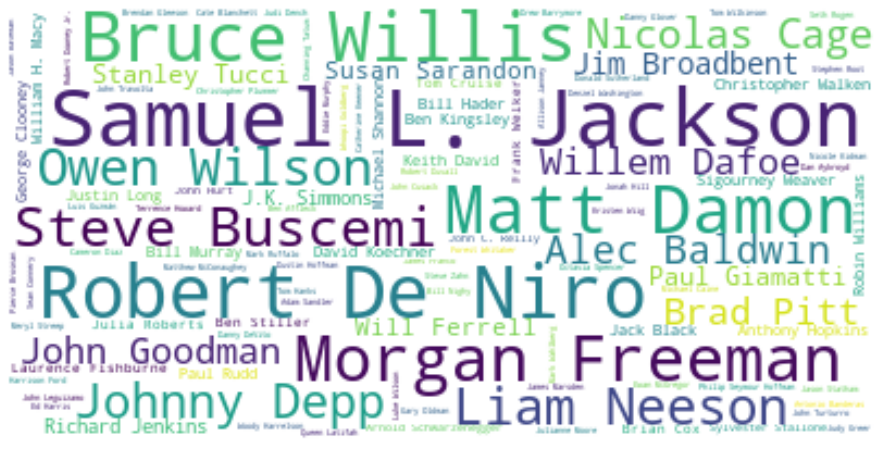

In [ ]:
# Word Cloud 

from wordcloud import WordCloud

wc = WordCloud(background_color='white', max_words=2000, random_state=1).generate_from_frequencies(cast_df['name'].value_counts().to_dict())
plt.figure(figsize=(16, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Release date is till 2017 (which has only one movie) 

data_hm=data1.loc[((data1['release_date']>'2000-00') & (data1['release_date']<'2017-00'))]

In [ ]:
data_hm.shape

(3493, 18)

In [ ]:
hm_list = [] 

for i in range(2000, 2017, 1): 
  al = [0,0,0,0,0,0,0,0,0,0,0,0]
  hm_list.append(al)

for ind in data_hm.index: 
  #print(df['Name'][ind], df['Stream'][ind]) 
  hm_list[int(data_hm['release_date'][ind][0:4]) % 2000][int(data_hm['release_date'][ind][6:8])-1]  += int(data_hm['revenue'][ind]) 

**(vi) Heat Map to visualize the total revenue of movies released in different months over the years** 

The months of February and June show the best revenue generation, and hence are observably a good time to release movies for larger box office collections. 


In [ ]:
import plotly.graph_objects as go

year_list = []
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] 

for i in range(2000, 2017, 1): 
  year_list.append(str(i))

fig = go.Figure(data=go.Heatmap(
                   z= hm_list,
                   x= month_list, 
                   y= year_list,
                   hoverongaps = False))
fig.show()

In [ ]:
# PLOT #7 
# Use cast_df to find average profit (revenue-budget) of selected actors
# Bar chart or something.

def findAvgProfit(actor_name):
  filter = cast_df[cast_df.name == actor_name]
  if len(filter) != 0:
    sub = abs(filter["revenue"]-filter["budget"])
    profit = sum(sub)/len(sub)
  else: 
    profit = 0  
  return(profit)

# Actors list.
actors = ["Robert De Niro", "Samuel L. Jackson", "Matt Damon", "Morgan Freeman", "Johnny Depp", "Alec Baldwin", "Al Pacino", "John Travolta", "Joseph Gordon-Levitt", "Liam Neeson", "Cate Blanchett", "Sandra Bullock", "Mel Gibson", 
           "Meryl Streep", "Leonardo DiCaprio", "Julia Roberts", "Keanu Reeves", "Halle Berry", "Tom Hanks", "Vin Diesel", "Russell Crowe" , "Stanley Tucci", "Bruce Willis", "Nicolas Cage", "Steve Buscemi", "Robin Williams", "Owen Wilson"]  
 
profits = []  # Average profit of each actor. 

for i in range(0,len(actors)):
  profits.append(findAvgProfit(actors[i]))

**(vii) Bar Plot visualizing the total average profit made by movies that casted the most popular actors ( as taken from the word cloud).**

Cate Blanchett peaks with  a profit of 240M US dollars. 

In [ ]:
import plotly.express as px

df = pd.DataFrame(list(zip(actors, profits)), columns =['Actor', 'Profit']) 

fig = px.bar(df, y='Profit', x='Actor', text='Profit')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.update_traces(marker_color='indianred', marker_line_color='black',
                  marker_line_width=1.9, opacity=0.7)

fig.show()

**MACHINE LEARNING: PREDICTING REVENUE MADE BY A MOVIE** 


In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/My Drive/data.csv")
results1=[]# contains r2 for various models
results2=[]# contains rmse for various models

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn import tree
data2 = data.drop(data.columns[0],axis=1)
y = data2['revenue'].values
data2=data2.drop(['revenue', 'original_language', 'vote_average','id', 'genres', 'title_x', 'keywords', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'cast', 'crew'] , axis = 1) 

# label_encoder object knows how to understand word labels. 
#label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
#data2['original_language']= label_encoder.fit_transform(data2['original_language']) 
  
#data2['original_language'].unique() 

X = data2.values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# Predict
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

model_score = regr_1.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print("coefficient of determination R^2 of the prediction.: ",model_score)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_2, squared = False))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_2))
results1.append(r2_score(y_test, y_2))
results2.append(mean_squared_error(y_test, y_2, squared = False))

coefficient of determination R^2 of the prediction.:  0.5985214269858288
Mean squared error: 89756969.58
Test Variance score: 0.71


In [ ]:
data2.head()

,budget,popularity,runtime,vote_count
0,237000000,150.437577,162.0,11800
1,300000000,139.082615,169.0,4500
2,245000000,107.376788,148.0,4466
3,250000000,112.312950,165.0,9106
4,260000000,43.926995,132.0,2124


**Comparison of actual values and predicted values through bar graph for Decsion Tree**

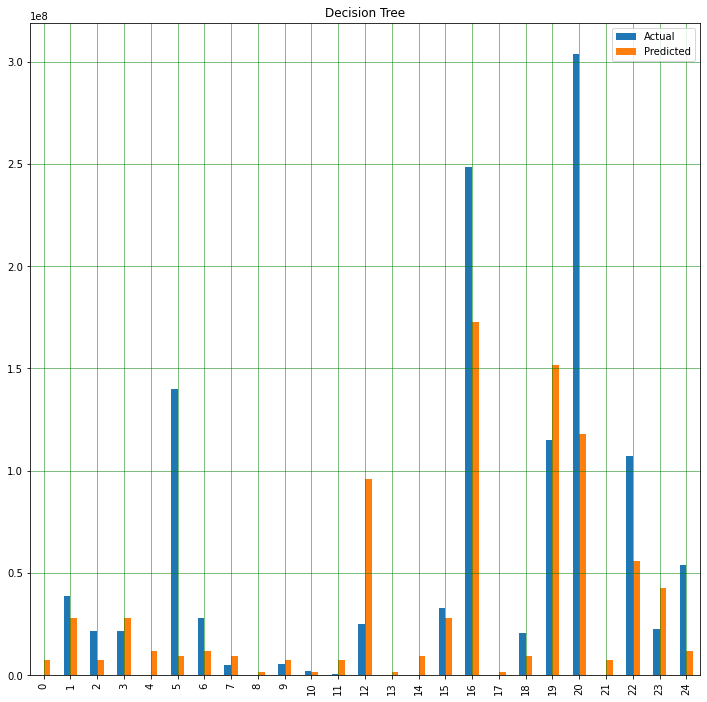

In [ ]:
import matplotlib.pyplot as plt

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_2.flatten()})
df1=df.head(25)
df1 = df.head(25)
df1.plot(kind='bar',figsize=(12,12))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.suptitle("Decision Tree")
plt.title("Decision Tree")
plt.show()

In [ ]:
#tree.plot_tree(regr_2) 

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor 

regressor = RandomForestRegressor(n_estimators = 150, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
model_score = regressor.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print("coefficient of determination R^2 of the prediction.: ",model_score)
y_3=regressor.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_3, squared = False))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_3))
results1.append(r2_score(y_test, y_3))
results2.append(mean_squared_error(y_test, y_3, squared = False))

coefficient of determination R^2 of the prediction.:  0.9616099627621358
Mean squared error: 31161670.80
Test Variance score: 0.96


**Visualising Feautre Importance**

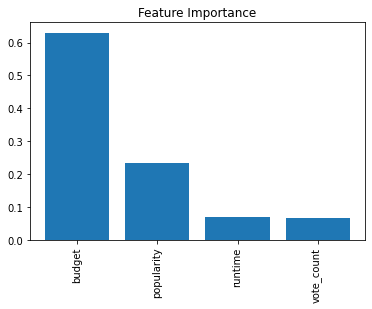

In [ ]:
import numpy as np
importances = regressor.feature_importances_

indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [i  for i in data2.columns]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

**Comparison of actual values and predicted values through bar graph for Random Forest**

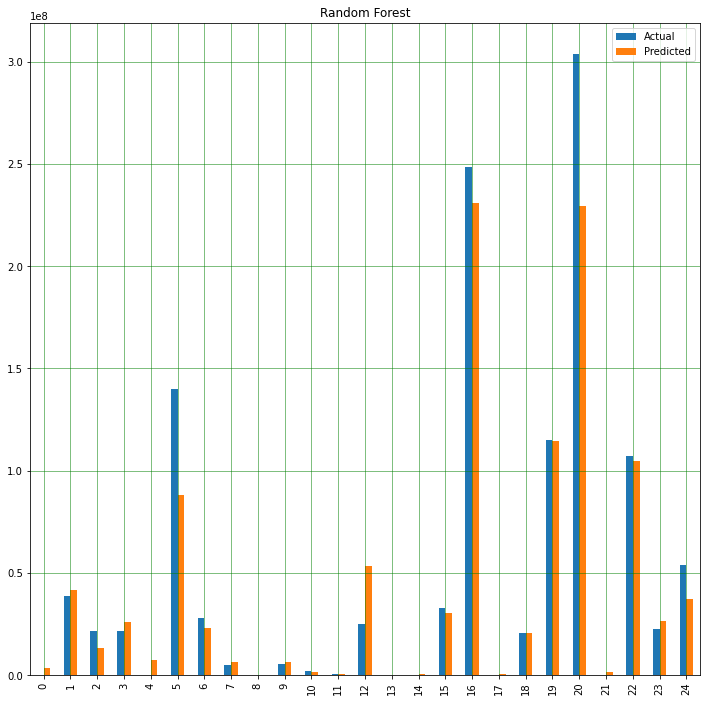

In [ ]:
import matplotlib.pyplot as plt

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_3.flatten()})
df1=df.head(25)
df1 = df.head(25)
df1.plot(kind='bar',figsize=(12,12))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Random Forest")
plt.show()

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_4=lr.predict(X_test)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
#print("coefficient of determination R^2 of the prediction.: ",model_score)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_4, squared = False))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_4))
results1.append(r2_score(y_test, y_4))
results2.append(mean_squared_error(y_test, y_4, squared = False))

Mean squared error: 90590818.68
Test Variance score: 0.70


**Comparison of actual values and predicted values through bar graph for Linear Regression**

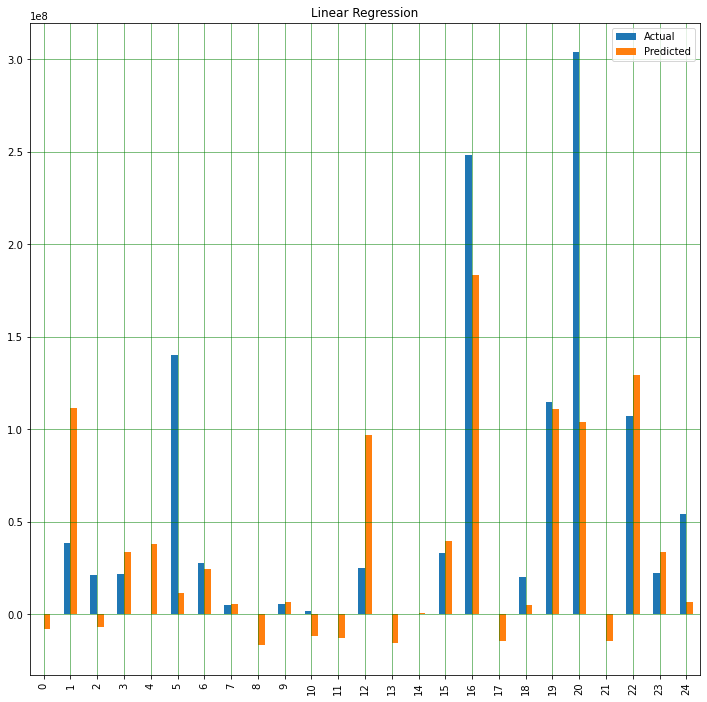

In [ ]:
import matplotlib.pyplot as plt

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_4.flatten()})
df1=df.head(25)
df1 = df.head(25)
df1.plot(kind='bar',figsize=(12,12))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Linear Regression")
plt.show()

**Comparison of models**

Text(0.5, 1.0, 'RMSE')

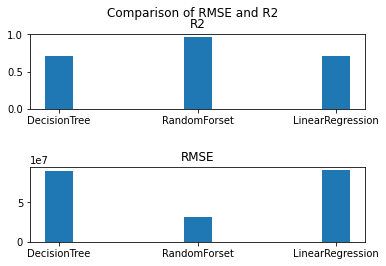

In [ ]:
results=[0.71,0.96,0.70,]
names=['DecisionTree','RandomForset','LinearRegression']
#fig,(ax1,ax2) = plt.subplots(1,2)
#fig.suptitle('Comparison of RMSE and R2')
#ax1.set_title("R2")
#ax2.set_title("RMSE")
#ax1.bar([0,5,10], results1,width=2)
#ax2.bar(names, results2,width=0.1)
#plt.xticks(, names)
import matplotlib.pyplot as plt
fig,ax=plt.subplots(nrows=2,ncols=1)
ax1=plt.subplot(2,1,1)
ax2=plt.subplot(2,1,2)
ax1.bar(names, results1,width=0.2)
#ax1.set_xticks(names)
#ax1.x
ax2.bar(names, results2,width=0.2)
fig.tight_layout(pad=3.0)
fig.suptitle('Comparison of RMSE and R2')
ax1.set_title('R2')
ax2.set_title('RMSE')

Conclusion:

It can be inferred from the graph that Random Forest gives the least residual error and best fit.